# Welcome to the BenchmarkEngine Tutorial Notebook

## Imports

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
from amlbench.benchmark.interface import Benchmark, Method, FeatureSpace
from amlbench.benchmark.benchmark_engine import BenchmarkEngine
from amlbench.benchmark.experiment_reports import get_reports_df
from amlbench.benchmark.split_strategies import LastDaysOfMonthSplit, TimePivotSplit
from amlbench.benchmark.project_folders import create_paths
from amlbench.benchmark.metric import Metric, METRIC_R2, METRIC_CVRMSE
from amlbench.benchmark.results_plots import (
    display_all_plots,
    display_bar_plot,
    display_box_plots,
)
from amlbench.benchmark.method_space import method_space

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LarsCV
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
)
from pathlib import Path
import joblib
import pandas as pd
import numpy as np

# Fixing the random seed
np.random.seed(10)

In [4]:
import sys

sys.path.append("../")  # append parent dir to sys.path

In [5]:
from main import params
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.rcParams.update(params)
sns.set_style("white")

In [7]:
pd.set_option("max_colwidth", 1500)
pd.set_option("display.width", None)

In [8]:
data = joblib.load("../data/processed/processed_uncleaned.joblib")

## Pre-split and post-split tranformation

In [9]:
# In the method object, you can choose to input any model and split_strategy

methods = method_space(
    model=[
        LinearRegression(),
        LassoCV(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        LarsCV(),
        ExtraTreesRegressor(),
        GradientBoostingRegressor(),
    ],
    split_strategy=[
        TimePivotSplit(),
        TimePivotSplit(pivot_quantile=0.5),
        TimePivotSplit(pivot_quantile=0.3),
    ],
)

### FeatureSpace

In [10]:
FEATURES = [
    "speed",
    "direction",
    "temperature",
    "pressure",
    "gust",
    "speed_11",
    "direction_11",
    "speed_24",
    "direction_24",
    "speed_27",
    "direction_27",
    "speed_28",
    "direction_28",
    "speed_32",
    "direction_32",
    "speed_44",
    "direction_44",
    "speed_52",
    "direction_52",
    "speed_53",
    "direction_53",
    "speed_75",
    "direction_75",
    "speed_76",
    "direction_76",
    "speed_84",
    "direction_84",
    "speed_93",
    "direction_93",
    "speed_94",
    "direction_94",
    "month",
    "capacity",
]

In [11]:
features_reduced = [
    "speed_28",
    "speed_44",
    "temperature",
    "speed_24",
    "speed",
    "pressure",
    "gust",
    "speed_11",
    "speed_32",
    "speed_53",
    "speed_75",
    "speed_76",
    "speed_94",
    "direction_94",
    "capacity",
]

In [12]:
TARGET = "production"

In [13]:
feature_space = FeatureSpace(name="all", features=FEATURES, methods=methods)
reduced = FeatureSpace(name="reduced", features=features_reduced, methods=methods)

### Benchmark

In [14]:
benchmark = Benchmark(feature_spaces=[feature_space, reduced], target=TARGET,)

## Creating the ProjectFolders instance

In [15]:
# This is used to store data, models and reports

project_folders = create_paths(
    data_path=Path("../data"),
    models_path=Path("../models"),
    reports_path=Path("../reports"),
)

In [16]:
R2 = METRIC_R2
R2.cross_validation = 5

# Implementing and fitting benchmark

In [17]:
my_bench = BenchmarkEngine(
    project_folders=project_folders, benchmarks=[benchmark], metrics=[R2, METRIC_CVRMSE]
)

In [18]:
# In order to fit the Benchmark on several cores, it is possible to input the keyword argument n_jobs (by default at 1, disabling any parallelization)

my_bench = my_bench.fit(data=data, n_jobs=4, show_progress_bar=True)

Experiments: 100%|██████████| 42/42 [10:04<00:00, 14.39s/it]


# Results

In [19]:
df = get_reports_df(experiments=my_bench.experiments)

In [20]:
df = df.drop(
    columns=[
        "List of features",
        "Pre-Split Transformation",
        "Post-Split Transformation",
        "Feature Selection",
    ]
)

In [21]:
df.sort_values("R² Test", ascending=False)

,Target,Train/Test split,Model,Features Relevance,R² Train,R² Test,R² Global(Train+Test),R² 5-folds Cross Validation,CVRMSE Train,CVRMSE Test,CVRMSE Global(Train+Test)
39,production,Train before 2018-09-08 17:00:00+02:00 and test after.,GradientBoostingRegressor,No features relevance available for this model,0.88,0.79,0.85,"[0.67, 0.86, 0.82, 0.86, 0.84]",26.90,34.22,31.87
18,production,Train before 2018-09-11 08:00:00+02:00 and test after.,GradientBoostingRegressor,No features relevance available for this model,0.89,0.77,0.85,"[0.7, 0.87, 0.84, 0.86, 0.86]",25.76,35.09,31.89
27,production,Train before 2018-09-08 17:00:00+02:00 and test after.,RandomForestRegressor,"speed_28 : 0.6, capacity : 0.1, speed_44 : 0.06, temperature : 0.05, speed_24 : 0.04, gust : 0.02, speed_32 : 0.02, speed_75 : 0.02, speed : 0.01, pressure : 0.01, speed_11 : 0.01, speed_53 : 0.01, speed_76 : 0.01, speed_94 : 0.01, direction_94 : 0.01",0.98,0.75,0.89,"[0.68, 0.83, 0.81, 0.83, 0.84]",10.17,36.70,27.89
6,production,Train before 2018-09-11 08:00:00+02:00 and test after.,RandomForestRegressor,"speed_28 : 0.6, capacity : 0.1, speed_44 : 0.06, temperature : 0.05, speed_24 : 0.03, speed_32 : 0.02, speed : 0.01, pressure : 0.01, gust : 0.01, speed_11 : 0.01, direction_32 : 0.01, speed_53 : 0.01, speed_75 : 0.01, speed_76 : 0.01, direction_93 : 0.01, speed_94 : 0.01, direction_94 : 0.01, direction : 0.0, direction_11 : 0.0, direction_24 : 0.0, speed_27 : 0.0, direction_27 : 0.0, direction_28 : 0.0, direction_44 : 0.0, speed_52 : 0.0, direction_52 : 0.0, direction_53 : 0.0, direction_75 : 0.0, direction_76 : 0.0, speed_84 : 0.0, direction_84 : 0.0, speed_93 : 0.0, month : 0.0",0.98,0.75,0.89,"[0.67, 0.85, 0.81, 0.83, 0.84]",9.92,36.64,27.83
36,production,Train before 2018-09-08 17:00:00+02:00 and test after.,ExtraTreesRegressor,No features relevance available for this model,1.00,0.74,0.89,"[0.7, 0.86, 0.83, 0.87, 0.84]",0.00,37.48,27.44
15,production,Train before 2018-09-11 08:00:00+02:00 and test after.,ExtraTreesRegressor,No features relevance available for this model,1.00,0.74,0.89,"[0.7, 0.87, 0.84, 0.88, 0.85]",0.00,37.35,27.39
0,production,Train before 2018-09-11 08:00:00+02:00 and test after.,LinearRegression,+1584.6*speed_44 +1223.43*speed_28 +1089.09*speed_24 +762.97*speed_32 +723.89*speed_53 +721.98*speed_76 +458.22*speed_75 +194.89*speed_11 +169.76*gust +156.67*month +6.81*direction_84 +5.58*direction_27 +4.91*direction_53 +2.64*direction_28 +1.31*capacity +0.51*direction_52 +0.24*pressure +0.22*direction -0.54*direction_93 -1.29*direction_11 -2.24*direction_24 -3.19*direction_75 -3.23*direction_44 -3.45*direction_32 -8.75*direction_94 -8.81*direction_76 -21.51*speed_27 -59.21*speed_93 -148.36*speed_84 -174.83*speed_52 -490.04*speed_94 -502.55*speed -544.69*temperature +112693.88,0.82,0.73,0.80,"[0.47, 0.78, 0.8, 0.82, 0.75]",33.37,38.40,37.26
13,production,Train before 2016-10-18 05:00:00+02:00 and test after.,LarsCV,+1443.85*speed_44 +1126.06*speed_28 +898.82*speed_24 +678.79*speed_53 +666.95*speed_32 +558.37*speed_76 +425.54*speed_75 +137.72*month +133.5*speed_11 +6.09*direction_84 +5.01*direction_27 +4.81*direction_53 +1.98*direction_28 +1.38*capacity +0.48*pressure +0.09*direction_52 -0.53*direction_93 -1.32*direction_11 -1.66*direction_75 -2.13*direction_32 -2.15*direction_44 -2.28*direction_24 -7.64*direction_94 -8.23*direction_76 -64.16*speed_27 -86.11*speed_93 -110.61*speed_84 -208.73*speed_52 -460.83*temperature -461.86*speed_94 +65506.79,0.83,0.73,0.77,"[0.54, 0.79, 0.57, 0.82, 0.72]",31.03,41.00,39.57
1,production,Train before 2016-10-18 05:00:00+02:00 and test after.,LinearRegression,+1490.84*speed_44 +1125.0*speed_28 +923.99*speed_24 +712.93*speed_53 +678.94*speed_32 +636.91*speed_76 +470.22*speed_75 +152.67*speed_11 +139.81*month +14.25*direction +5.55*direction_84 +4.98*direction_27 +4.14*direction_53 +1.67*direction_28 +1.39*capacity +0.53*pressure +0.11*direction_52 -1.78*direction_93 -1.85*direction_11 -3.01*direction_32 -3.12*d

# Display Results

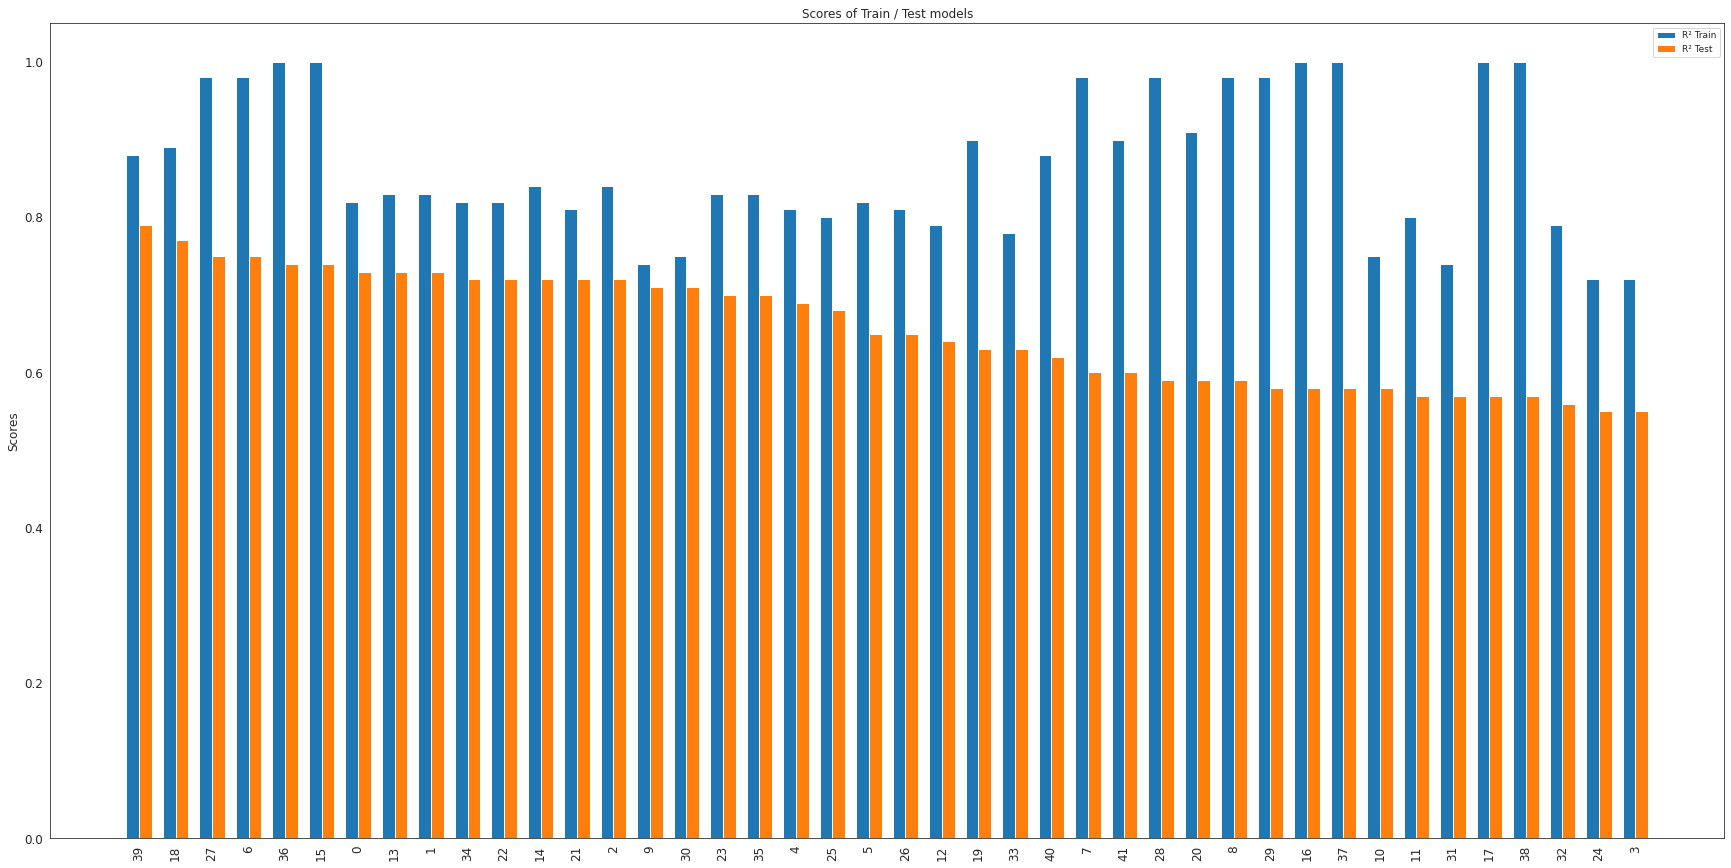

In [22]:
display_bar_plot(input_df=df)

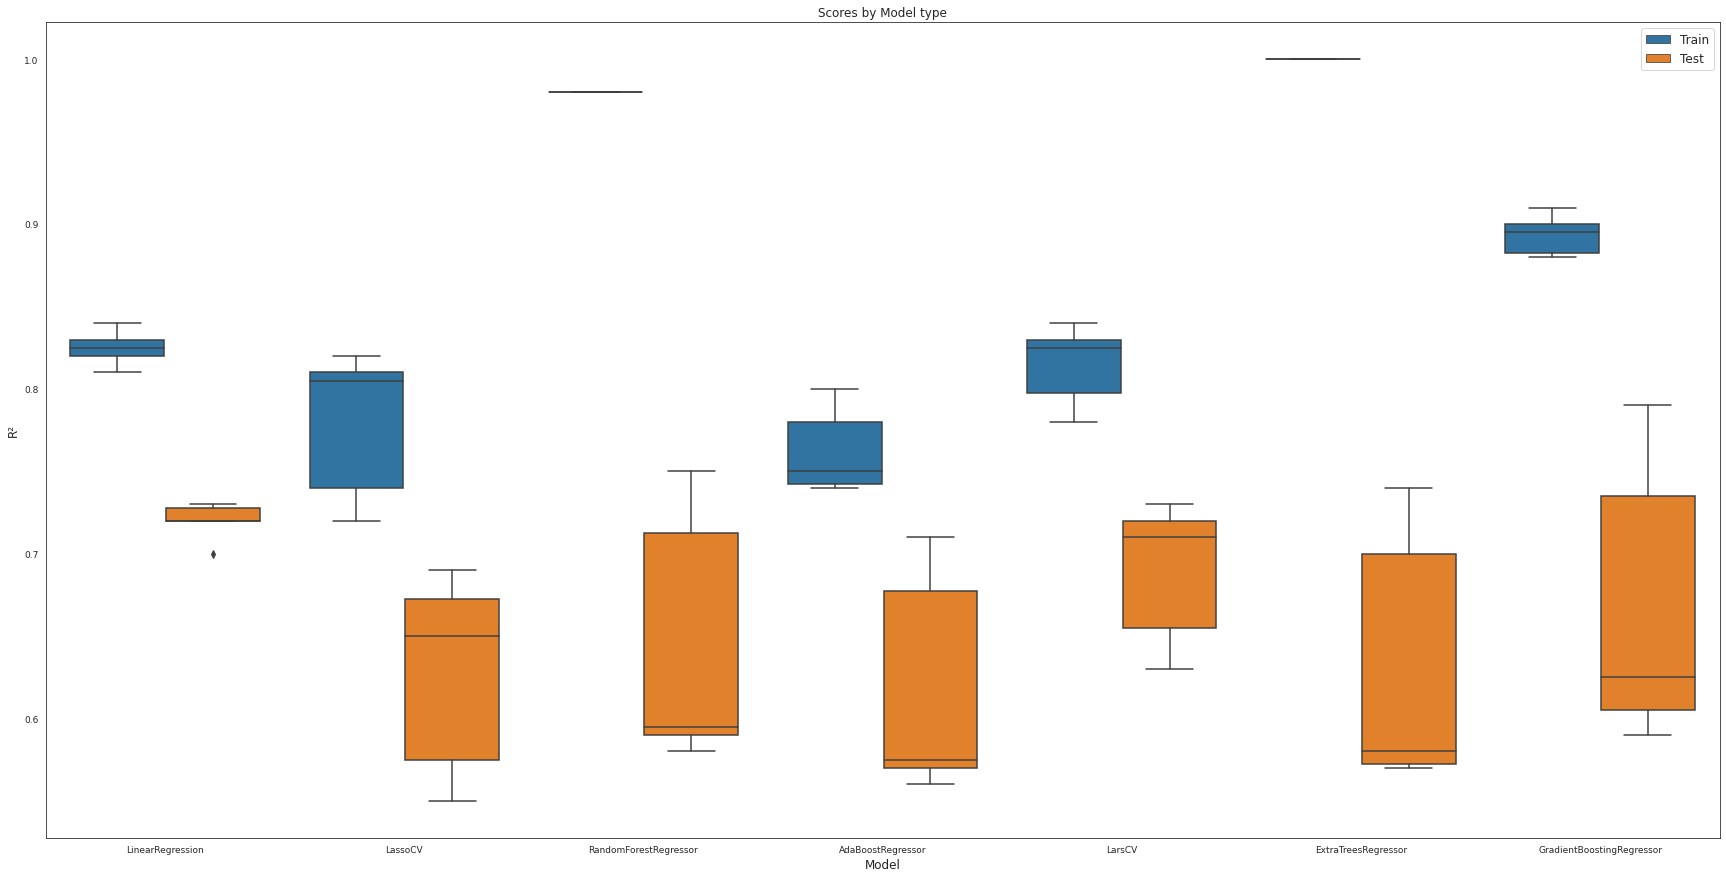

In [23]:
display_box_plots(input_df=df, method_attributes=["Model"])

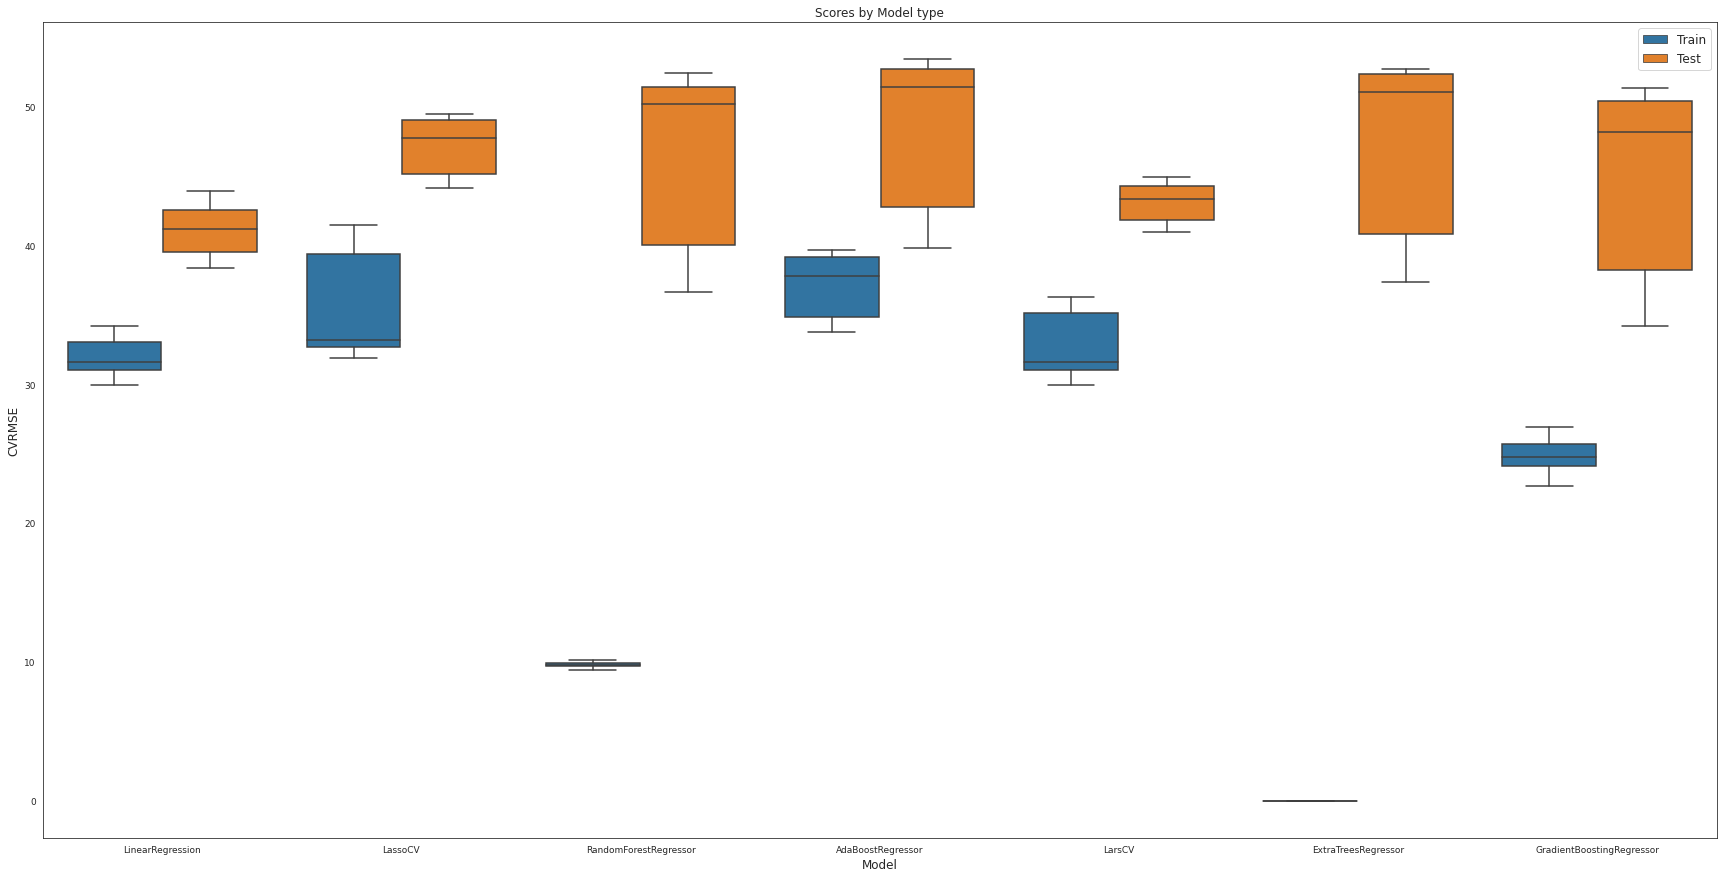

In [24]:
display_box_plots(input_df=df, metric_name="CVRMSE", method_attributes=["Model"])

Text(0, 0.5, 'Relative Production (MW/MW_installed)')

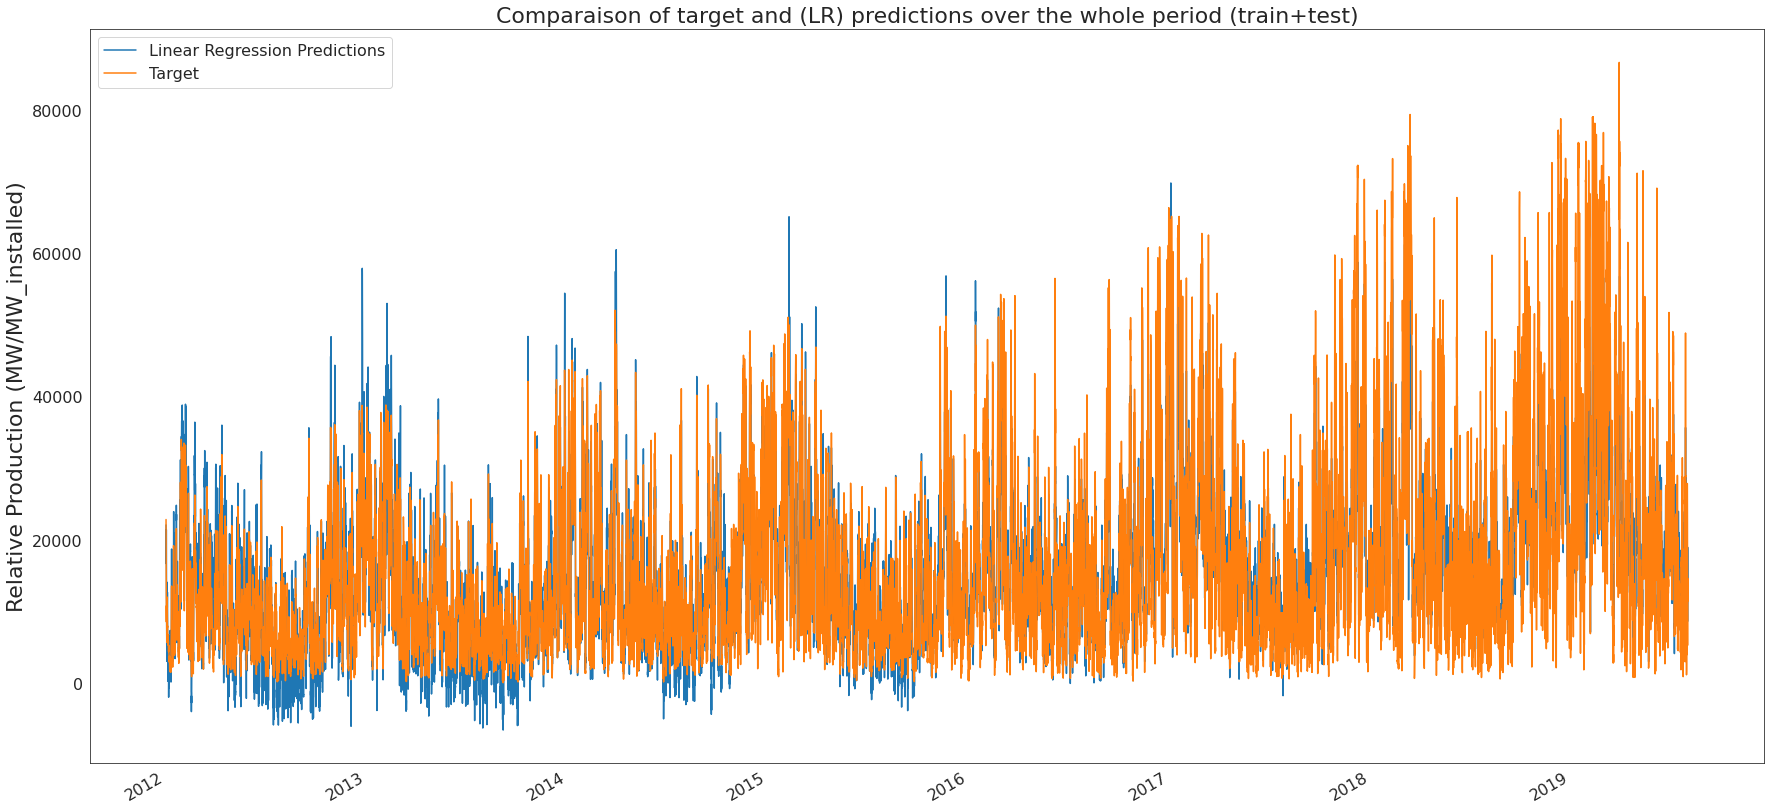

In [25]:
my_bench.experiments[0].predict(data[FEATURES].dropna()).plot(
    label="Linear Regression Predictions"
)
data[TARGET].plot(label="Target")
plt.legend()
plt.title(
    "Comparaison of target and (LR) predictions over the whole period (train+test)"
)
plt.ylabel("Relative Production (MW/MW_installed)")

In [26]:
pred = pd.DataFrame()

In [27]:
pred["model_prediction_LR"] = my_bench.experiments[0].predict(data[FEATURES].dropna())

In [28]:
pred["model_prediction_extra_trees"] = my_bench.experiments[15].predict(
    data[FEATURES].dropna()
)

In [29]:
pred["target"] = data[TARGET].dropna()

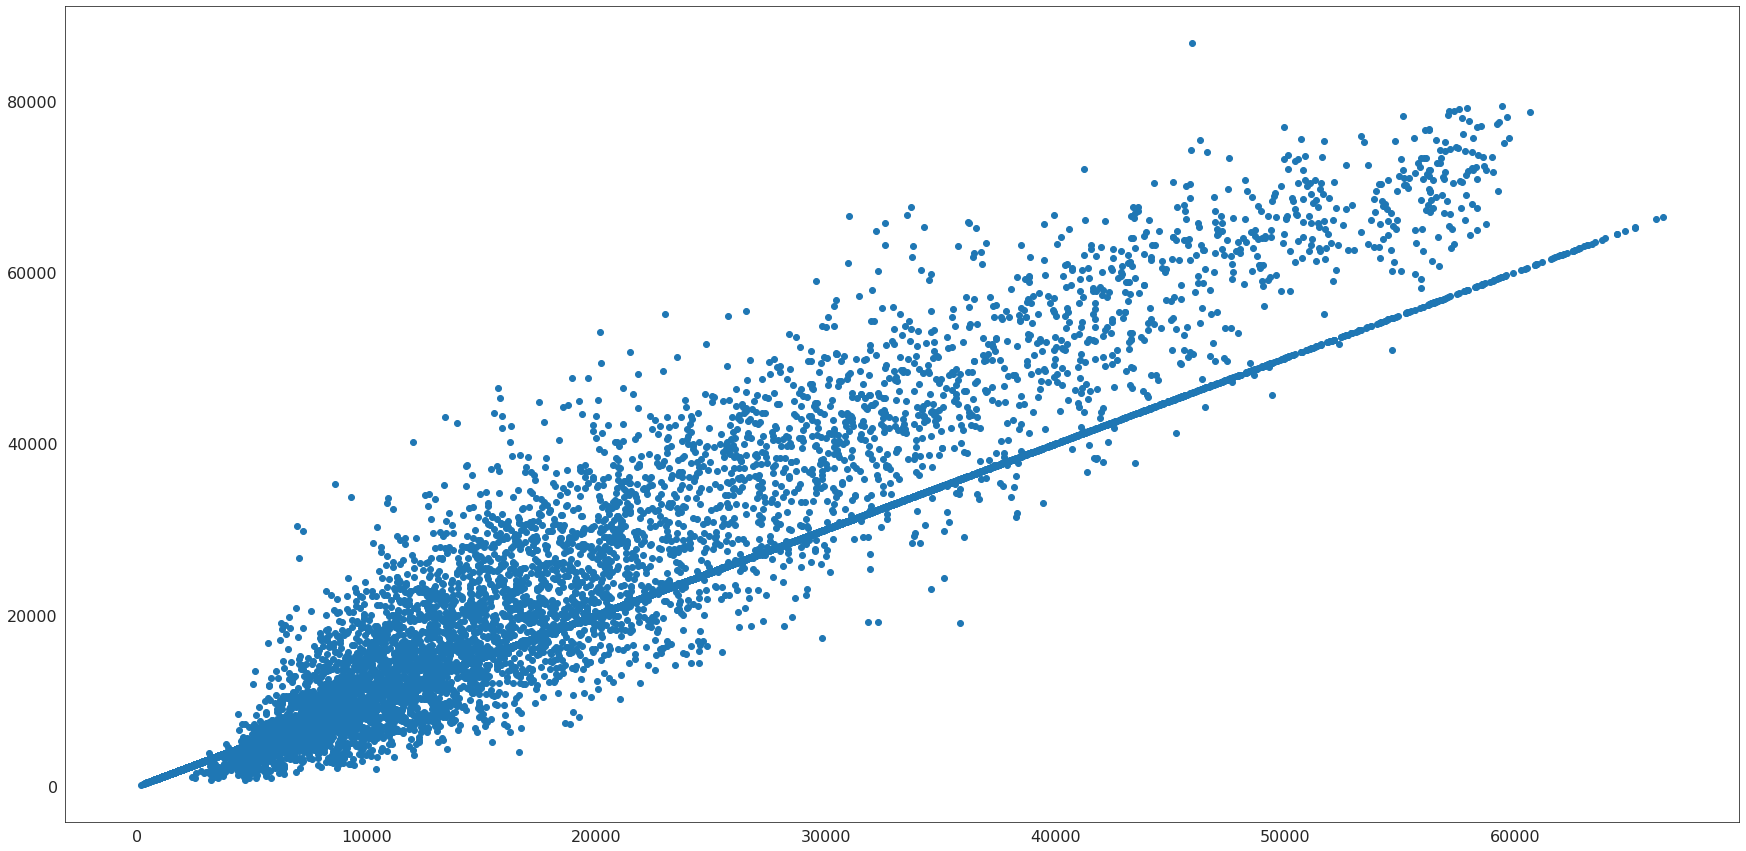

In [30]:
plt.scatter(pred["model_prediction_extra_trees"], pred["target"])

In [31]:
plt.scatter(pred["model_prediction"], pred["target"])
plt.title(
    "Comparaison of target and (LR) predictions over the whole period (train+test)"
)
plt.ylabel("Relative Production (MW/MW_installed) - Target")
plt.xlabel("LR Predictions")

KeyError: 'model_prediction'

In [ ]:
corr = data[FEATURES + [TARGET]].corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
    cmap="viridis",
)